<h4 style="margin:0;"><b>Maciej Bogusławski (331362), Hubert Kaczyński (331386)</b></h4>
<h1 style="margin:0;"><b>Inżynieria Uczenia Maszynowego</b></h1>
<p style="margin-top:0.4rem;"><b>Projekt 6. Etap 1.</b></p>

Niniejszy notatnik stanowi pierwszy etap projektu realizowanego w ramach przedmiotu Inżynieria Uczenia Maszynowego w realizacji 25Z.

### **Definicja problemu biznesowego**
Serwis Nocarz to portal umożliwiający wyszukiwanie oraz rezerwację noclegów. Firma Nocarz szczyci się wysoką jakością wsparcia dla oferentów i chciałaby usprawnić proces dodawania nowych lokali do platformy poprzez automatyczne sugerowanie optymalnej ceny za noc. Niniejszy projekt ma zatem za zadanie automatyczne i trafne przewidywanie wartości jednej nocy na podstawie charakterystyki oferowanej nieruchomości, a także aktualnego kontekstu rynkowego. 

Wdrożenie funkcjonalności automatycznego sugerowanie ceny zapewni liczne korzyści biznesowe. Przede wszystkim, system pomoże mniej doświadczonym oferentom wycenić swój lokal w sposób konkurencyjny, ułatwiając im wejście na rynek z realistyczną wyceną, typową dla danej charakterystyki nieruchomości w danej lokalizacji. W ten sposób również firma Nocarz zyska przewagę nad konkurencją, oferując eksperckie narzędzie wspierające nowych oferentów. Wdrożenie opisanej funkcjonalności przyczyni się więc do zwiększenia satysfakcji zarówno oferentów jak i klientów, co pozytywnie przełoży się również na reputację serwisu.


### **Definicja zadań modelowania**
Celem projektu jest stworzenie modelu regresji przewidującego stawkę bazową za noc na podstawie dostępnych atrybutów oferty w momencie dodawania jej przez oferenta. Za dane wejściowe tworzony model przyjmować powinien charakterystykę nieruchomości, taką jak lokalizacja, rozmiar, typ nieruchomości, dostępne udogodnienia itp., a także kontekst, taki jak dotychczasowa ocena hosta czy liczba oferowanych przez hosta nieruchomości. Na podstawie tych danych tworzony model powinien zwracać sugerowaną cenę za noc – estymowaną typową stawkę bazową dla ofert o podobnych charakterystykach, którą właściciel lokalu ustala podczas publikacji oferty.

### **Założenia projektowe**
Kluczowym założeniem projektowym jest wyraźne ustalenie pojęcia ceny, którą system stara się przewidzieć. Za poszukiwaną cenę wystawianej oferty w danym czasie uznawana jest stawka bazowa ustalana przez oferentów dla ofert o podobnych charakterystykach. W ramach implementacji modelu zakłada się zatem, iż stawki bazowe obserwowane w danych reprezentują realny stan rynku w momencie zbierania danych. 

Na potrzeby zadania, dane historyczne ofert w serwisie Nocarz są uznawane za reprezentatywne dla obecnych warunków rynkowych. Przyjęto, iż otrzymane dane nie zostały zdominowane przez wydarzenia wyjątkowe jak wydarzenia jednorazowe czy katastrofy naturalne i wciąż są aktualne w obecnym kontekście rynkowym – nie wpłynęły na nie znaczące zmiany makroekonomiczne jak inflacja, zmiany trendów w turystyce czy zmiany w przepisach. 

Założono, iż model używany będzie do sugerowania cen dla ofert o podobnej strukturze cech jak te w zbiorze uczącym. Przede wszystkim przyjęto, że nowe oferty wystawiane są dla lokali w tym samym rejonie geograficznym, czyli w regionie archipelagu Balearów. Wykorzystanie modelu do sugerowania cen na innych rynkach geograficznych wymagałaby nowych danych bądź wykorzystania technik transfer learning – mogłoby się bowiem okazać, iż np. goście noclegów w Finlandii dużo bardziej cenią sobie wyposażenie mieszkania w saunę, lecz zdecydowanie mniej istotne jest dla nich posiadanie balkonu. 

Sugerowana przez system cena nie jest oczywiście narzucana oferentowi i stanowi jedynie rekomendację mającą na celu wesprzeć mniej doświadczonych właścicieli. Ostateczną decyzję w sprawie stawki bazowej swojej nieruchomości zawsze podejmuje sam oferent.

### **Kryteria sukcesu**
Kryteria sukcesu rozważać można na poziomie zarówno technicznym, jak i biznesowym.

Pod kątem technicznym, stworzony model powinien osiągać akceptowalny błąd prognozy mierzony metrykami takimi jak średni błąd bezwzględny (MAE) bądź pierwiastek kwadratowy błędu średniokwadratowego (RMSE). Analiza wyników modeli bazowych przeprowadzona w dalszych częściach niniejszego sprawozdania pokazuje, iż naiwne podejścia bazujące na średniej bądź medianie ceny prowadzą do bardzo wysokiego błędu względnego, przekraczającego 50% średniej ceny za noc, czyniąc je mało przydatnymi w praktyce. Proste modele uwzględniające dzielnicę, w jakiej znajduje się nieruchomość lub podstawowe cechy lokalu pozwalają jednak znacząco poprawić jakość predykcji - proste modele oparte na regresji liniowej oraz lasach losowych osiągają MAE na poziomie około 40-45% średniej ceny oraz współczynnik $R^2$ na poziomie około 0.35-0.40, sugerując użyteczny sygnał cenowy otrzymanych danych. Warto jednak podkreślić, iż osiągnięcie takich wyników wymagało pewnych istotnych fundamentalnych założeń, wymagających zatwierdzenia przez klienta - wyraźny problem w otrzymanych danych stanowi duża liczba nierealistycznie wysokich cen, sugerująca błędy bądź obecność powszechnego zjawiska zawyżania przez gospodarzy cen do nierealistycznych wartości, które nie odzwierciedlają prawdziwego charakteru rynku turystycznego. Problem ten został zanalizowany szerzej w dalszych rozdziałach sprawozdania. Usunięcie tych potencjalnych anomalii, poprzez przyjęcie konkretnych opisanych w ramach niniejszego notatnika założeń, zebranie lepszych danych bądź ręczne etykietowanie anomalii przez grupę ekspertów, stanowi niezbędny krok w celu przejścia do dalszych faz modelowania. 

Zakładając pozbycie się opisanego zjawiska nierealistycznie zawyżonych cen tak jak ma to miejsce w dalszych częściach sprawozdania, za satysfakcjonujące kryterium sukcesu na tym etapie projektu można więc uznać osiągnięcie jakości predykcji wyraźnie lepszej niż modele naiwne poprzez obniżenie względnego MAE do poziomu około 35–40% średniej ceny za noc lub uzyskanie wartości współczynnika $R^2$ powyżej progu 0.4. Istotny element sukcesu stanowi również akceptowalny czas interferencji modelu. Za przyjęty w tym zakresie próg biznesowy przyjęto maksimum 500 ms.

Pod kątem biznesowym, sukces modelu mógłby być mierzony wskaźnikami adopcji udostępnionego oferentom rozwiązania, satysfakcji oferentów z rekomendacji oraz wzrostu konwersji ofert. Dostęp do tych metryk byłby jednak dostępny po wdrożeniu rozwiązania wraz z odpowiednimi mechanizmami zbierania tych danych, zatem głównym wyznacznikiem sukcesu na etapie implementacji projektu pozostają wymienione wyżej kryteria techniczne.




## **Eksploracyjna analiza danych**

### **Podsumowanie zbioru danych**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df = pd.read_csv("data/listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,8.011919e+17,https://www.nocarz.pl/rooms/801191906340480154,NaN,NaN,city scrape,Nenufars - Ideal Property Mallorca,Holiday home for 4 people with everything you ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,NaN,https://www.nocarz.pl/users/show/65697804,NaN,2016-04-04,"Port d'Alcúdia, Spain",DE\nUnser seit vielen Jahren auf Mallorca ansä...,within an hour,100%,99%,NaN,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,233.0,491.0,['phone'],t,NaN,NaN,Alcúdia,NaN,39.827870,3.114820,NaN,Entire home/apt,4.0,NaN,1.5 baths,3.0,3.0,"[""Refrigerator"", ""Coffee maker"", ""Cooking basi...",$114.00,1.0,1125.0,1.0,13.0,3.0,1125.0,NaN,463.8,NaN,t,4.0,4.0,9.0,251.0,2025-03-09,11.0,7.0,1.0,NaN,NaN,42.0,4788.0,2023-05-03,2025-02-22,4.64,4.73,4.73,4.82,4.64,4.91,4.55,ETV/14488,t,NaN,NaN,0.0,NaN,0.49
1,7.171869e+17,https://www.nocarz.pl/rooms/717186949686673699,2.025031e+13,NaN,city scrape,Finca Sa Pedrera d'es Turó,"Located in Manacor, the country house Finca Sa...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,432584184.0,https://www.nocarz.pl/users/show/432584184,Michael,2021-11-19,"Madrid, Spain",NaN,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Urbanización Monte de los Almendros,458.0,973.0,"['email', 'phone']",t,t,NaN,Manacor,NaN,39.554804,3.345853,Entire villa,Entire home/apt,6.0,2.0,2 baths,3.0,3.0,"[""Refrigerator"", ""Coffee maker"", ""Private entr...","$9,000.00",1.0,365.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,t,NaN,53.0,NaN,NaN,2025-03-10,7.0,NaN,0.0,282.0,1.0,6.0,54000.0,2023-01-04,NaN,4.86,NaN,NaN,4.86,4.86,4.57,NaN,ETV/8910,NaN,61.0,61.0,0.0,0.0,NaN
2,9.292400e+05,https://www.nocarz.pl/rooms/929240,2.025031e+13,NaN,city scrape,HOUSE SUIT: Fun and Relax in Mallorca,NaN,This is the harbour of Felanitx. A quiet fishi...,NaN,4645996.0,https://www.nocarz.pl/users/show/4645996,Svitlana,2013-01-09,"Balearic Islands, Spain",NaN,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Polygon 4,NaN,103.0,"['email', 'phone', 'work_email']",t,NaN,"Felanitx, Illes Balears, Spain",Felanitx,NaN,NaN,3.249240,Entire townhouse,Entire home/apt,NaN,NaN,2.5 baths,3.0,4.0,"[""55 inch HDTV with Amazon Prime Video, Disney...",$378.00,1.0,365.0,5.0,7.0,180.0,180.0,5.4,180.0,NaN,t,29.0,59.0,89.0,350.0,2025-03-08,4.0,NaN,0.0,284.0,1.0,6.0,NaN,NaN,2024-08-22,4.50,3.75,4.25,4.75,4.75,4.00,NaN,ETV/7070,t,84.0,84.0,NaN,0.0,0.04
3,1.357024e+18,https://www.nocarz.

In [2]:
print(f"Size of the dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print("Names of the columns:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

Size of the dataset: 16404 rows, 79 columns
Names of the columns:
1. id
2. listing_url
3. scrape_id
4. last_scraped
5. source
6. name
7. description
8. neighborhood_overview
9. picture_url
10. host_id
11. host_url
12. host_name
13. host_since
14. host_location
15. host_about
16. host_response_time
17. host_response_rate
18. host_acceptance_rate
19. host_is_superhost
20. host_thumbnail_url
21. host_picture_url
22. host_neighbourhood
23. host_listings_count
24. host_total_listings_count
25. host_verifications
26. host_has_profile_pic
27. host_identity_verified
28. neighbourhood
29. neighbourhood_cleansed
30. neighbourhood_group_cleansed
31. latitude
32. longitude
33. property_type
34. room_type
35. accommodates
36. bathrooms
37. bathrooms_text
38. bedrooms
39. beds
40. amenities
41. price
42. minimum_nights
43. maximum_nights
44. minimum_minimum_nights
45. maximum_minimum_nights
46. minimum_maximum_nights
47. maximum_maximum_nights
48. minimum_nights_avg_ntm
49. maximum_nights_avg_ntm
50

W ramach procesu wnioskowania o dane dotyczące działalności firmy Nocarz otrzymano plik CSV listings.csv zawierający 16404 wiersze oraz 79 kolumn. Każdy wiersz w zbiorze reprezentuje jedną ofertę w danym momencie czasu, zaś kolumny przedstawiają różnorodne elementy tej oferty, dotyczące m.in. lokalizacji, typu nieruchomości, udogodnień, liczby pokoi, informacje dotyczące właścicieli, takie jak średni czas, w jakim oferent odpowiada na zapytania potencjalnych klientów czy średnia ocena jakości komunikacji z oferentem, informacje dotyczące ocen i recenzji lokalu, a także dane o dostępności i historii rezerwacji. 

### **Analiza braków danych**

In [3]:
df_summary = pd.DataFrame(
    {
        "column": df.columns,
        "dtype": df.dtypes.values,
        "num_nulls": df.isnull().sum().values,
        "perc_nulls": (df.isnull().mean() * 100).round(2).values,
    }
)

df_summary.style.background_gradient(
    gmap=df_summary["perc_nulls"], cmap="RdYlGn_r"
)

,column,dtype,num_nulls,perc_nulls
0,id,float64,3300,20.120000
1,listing_url,object,3218,19.620000
2,scrape_id,float64,3305,20.150000
3,last_scraped,object,3234,19.710000
4,source,object,3215,19.600000
5,name,object,3328,20.290000
6,description,object,3631,22.130000
7,neighborhood_overview,object,11588,70.640000
8,picture_url,object,3330,20.300000
9,host_id,float64,3230,19.690000


Każda z 79 kolumn w otrzymanym zbiorze danych zawiera pewien odsetek brakujących wartości. Dwie kolumny, `neighbourhood_group_cleansed` oraz `calendar_updated`, nie zawierają żadnych wartości, nie są zatem w żaden sposób użyteczne na potrzeby zadania.

#### **Obsługa braków danych**
Duża liczba braków w otrzymanych danych wymusza potrzebę przyjęcia konkretnej strategii dotyczącej obsługi brakujących danych. W ramach przyjętej strategii, wiersze zawierajace braki w kolumnie przyjętej zmiennej docelowej (kolumnie `price`), stanowiące ok. 26,96% wszystkich wierszy, zostaną usunięte. W przypadku braków w rozważanych kolumnach numerycznych użyta zostanie imputacja medianą, natomiast w przypadku cech kategorialnych brakujące wartości zostaną zastąpione najczęściej występującą wartością.

### **Analiza zmiennej docelowej**
Zakłada się, iż kolumna `price`, stanowiąca zmienną docelową, reprezentuje stawkę bazową za jedną noc w dolarach. W otrzymanych danych cecha ta ma format tekstowy i wymaga konwersji na typ numeryczny.

In [4]:
def convert_price(price):
    if isinstance(price, str):
        return float(price.replace("$", "").replace(",", ""))
    return price


df["price_numeric"] = df["price"].apply(convert_price)
df[["price", "price_numeric"]].head(10)

,price,price_numeric
0,$114.00,114.0
1,"$9,000.00",9000.0
2,$378.00,378.0
3,$380.00,380.0
4,NaN,NaN
5,"$10,000.00",10000.0
6,$190.00,190.0
7,$75.00,75.0
8,$173.00,173.0
9,$250.00,250.0


In [5]:
print(
    f"Number of listings with price < $2000: {df[df['price_numeric'] < 2000].shape[0]}"
)
print(
    f"Number of listings with price >= $2000 and <= $7000: {df[(df['price_numeric'] >= 2000) & (df['price_numeric'] <= 7000)].shape[0]}"
)
print(
    f"Number of listings with price > $7000: {df[df['price_numeric'] > 7000].shape[0]}"
)
print(
    f"Number of listings with price exactly $9999: {df[df['price_numeric'] == 9999].shape[0]}"
)
print(
    f"Number of listings with price exactly $10000: {df[df['price_numeric'] == 10000].shape[0]}"
)
print(
    f"Number of listings with price > $10000: {df[df['price_numeric'] > 10000].shape[0]}"
)

df["price_numeric"].describe()

Number of listings with price < $2000: 10793
Number of listings with price >= $2000 and <= $7000: 73
Number of listings with price > $7000: 1115
Number of listings with price exactly $9999: 111
Number of listings with price exactly $10000: 483
Number of listings with price > $10000: 9


count    11981.000000
mean      1157.017862
std       2710.525925
min         10.000000
25%        135.000000
50%        212.000000
75%        416.000000
max      16207.000000
Name: price_numeric, dtype: float64

In [6]:
pd.set_option("display.max_rows", False)

df[(df["price_numeric"] < 30) | (df["price_numeric"] > 9999)][
    ["name", "price_numeric", "bathrooms", "bedrooms", "beds", "property_type"]
].sort_values(by="price_numeric")

,name,price_numeric,bathrooms,bedrooms,beds,property_type
6439,Casa Font de Sa Cala,10.0,3.0,3.0,6.0,Entire chalet
5358,300qm Ferienvilla mit Turm - nur 15m bis zum M...,12.0,2.5,4.0,6.0,NaN
2286,Luminosa Habitación en Palma,18.0,1.0,3.0,NaN,Private room in rental unit
3838,Habitación Arenal,20.0,1.5,1.0,1.0,Private room in rental unit
15098,NaN,21.0,1.5,1.0,NaN,NaN
1900,Habitación centro de Palma,22.0,NaN,1.0,1.0,Private room in rental unit
9368,Simple room for 2,22.0,1.0,1.0,2.0,Private room in rental unit
659,NaN,22.0,NaN,4.0,1.0,NaN
162,"Habitación 2 con baño compartido, en piso Aven...",22.0,1.0,4.0,NaN,Private room in rental unit
...,...,...,...,...,...,...


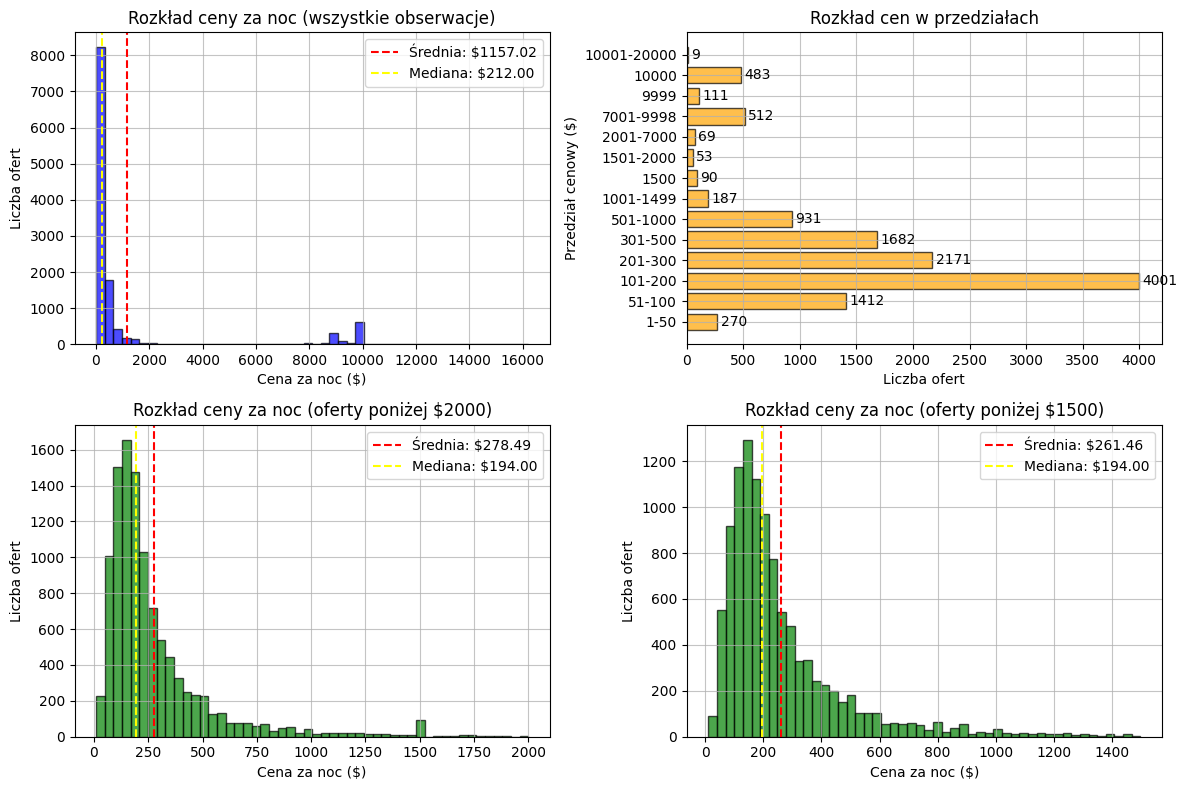

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
ax1 = axes[0, 0]

price_data = df["price_numeric"].dropna()
ax1.hist(price_data, bins=50, color="blue", edgecolor="black", alpha=0.7)
ax1.set_xlabel("Cena za noc ($)")
ax1.set_ylabel("Liczba ofert")
ax1.set_title("Rozkład ceny za noc (wszystkie obserwacje)")
ax1.grid(alpha=0.75)
ax1.axvline(
    price_data.mean(),
    color="red",
    linestyle="dashed",
    label=f"Średnia: ${price_data.mean():.2f}",
)
ax1.axvline(
    price_data.median(),
    color="yellow",
    linestyle="dashed",
    label=f"Mediana: ${price_data.median():.2f}",
)
ax1.legend()

ax2 = axes[0, 1]
price_bins = [
    0,
    50,
    100,
    200,
    300,
    500,
    1000,
    1499,
    1500,
    2000,
    7000,
    9998,
    9999,
    10000,
    20000,
]
price_counts = pd.cut(price_data, bins=price_bins).value_counts().sort_index()
ax2.barh(
    range(len(price_counts)),
    price_counts.values,
    color="orange",
    edgecolor="black",
    alpha=0.7,
)
ax2.set_yticks(range(len(price_counts)))
ax2.set_yticklabels(
    [
        (
            f"{price_bins[i]+1}-{price_bins[i+1]}"
            if price_bins[i] + 1 != price_bins[i + 1]
            else f"{price_bins[i]+1}"
        )
        for i in range(len(price_bins) - 1)
    ]
)
ax2.set_xlabel("Liczba ofert")
ax2.set_ylabel("Przedział cenowy ($)")
ax2.set_title("Rozkład cen w przedziałach")
for i, v in enumerate(price_counts.values):
    ax2.text(v + 30, i, str(v), color="black", va="center")
ax2.grid(alpha=0.75)

ax3 = axes[1, 0]
price_filtered = price_data[price_data < 2000]
ax3.hist(price_filtered, bins=50, color="green", edgecolor="black", alpha=0.7)
ax3.set_xlabel("Cena za noc ($)")
ax3.set_ylabel("Liczba ofert")
ax3.set_title("Rozkład ceny za noc (oferty poniżej $2000)")
ax3.grid(alpha=0.75)
ax3.axvline(
    price_filtered.mean(),
    color="red",
    linestyle="dashed",
    label=f"Średnia: ${price_filtered.mean():.2f}",
)
ax3.axvline(
    price_filtered.median(),
    color="yellow",
    linestyle="dashed",
    label=f"Mediana: ${price_filtered.median():.2f}",
)
ax3.legend()

ax4 = axes[1, 1]
price_filtered = price_data[price_data < 1500]
ax4.hist(price_filtered, bins=50, color="green", edgecolor="black", alpha=0.7)
ax4.set_xlabel("Cena za noc ($)")
ax4.set_ylabel("Liczba ofert")
ax4.set_title("Rozkład ceny za noc (oferty poniżej $1500)")
ax4.grid(alpha=0.75)
ax4.axvline(
    price_filtered.mean(),
    color="red",
    linestyle="dashed",
    label=f"Średnia: ${price_filtered.mean():.2f}",
)
ax4.axvline(
    price_filtered.median(),
    color="yellow",
    linestyle="dashed",
    label=f"Mediana: ${price_filtered.median():.2f}",
)
ax4.legend()

plt.tight_layout()
plt.show()

Analiza otrzymanych danych pod kątem wartości zmiennej docelowej `price` wykazuje często pojawiające się anomalie cenowe, takie jak oferta wynajem całego domku letniskowego z sześcioma łóżkami za 10 dolarów za noc bądź domu z jedną łazienką za ponad 10 000 dolarów. Wyraźnie widoczna na wykresach bardzo mała liczba ofert między kwotą 2000 a 7000 dolarów implikuje, iż oferty pojawiające się w przedziale cenowym $7000-$10000 nie stanowią prawdziwych reprezentatywnych ofert, a wiersze te są raczej wynikiem błędu, niepoprawnego oznaczenia danych (np. poprzez podanie ceny za tydzień, a nie jedną noc) lub podania zaporowej ceny przez właściciela, aby w praktyce uniemożliwić wynajem lokalu. Ostatnie zjawisko stanowi główny temat innego projektu w ramach przedmiotu Inżynieria Uczenia Maszynowego (temat 1). Szczegółowe wykrywanie obecności tego fenomenu wykracza poza zakres niniejszego projektu. Podejrzenia dotyczące występowania tego zjawiska wzmaga fakt, iż dokładnie 50.0% ofert o wartości 2000 dolarów lub wyższej mają wartość dokładnie 9999 lub 10000 dolarów, sugerując, iż są to wartości domyślne (placeholdery), a nie prawdziwe ceny. Podobnie, nadnaturalnie duża liczba ofert o cenie za noc wynoszącej dokładnie $1500 sugeruje, iż jest to domyślna, zaporowa wartość, niereprezentująca ceny rynkowej. Biorąc pod uwagę te obserwacje, na potrzeby dalszej analizy danych oferty o wartości dokładnie 1500 dolarów i wyższych zostały potraktowane jako anomalie i odfiltrowane. W ten sposób uzyskano 10654 obserwacje o średniej cenie w wysokości $261.46.

### **Analiza rozkładów atrybutów**
Podstawowe cechy nieruchomości są obszernie opisane w otrzymanych danych. Wśród potencjalnie cennych informacji wyróżnić można choćby liczbę sypialni (kolumna `bedrooms`), liczbę łóżek (kolumna `beds`) oraz liczbę łazienek (kolumna `bathrooms`). Kluczową informacją dla potencjalnych gości jest również maksymalna liczba osób, które mogą nocować w lokalu (kolumna `accommodates`), a także typ wynajmowanego pokoju (`room_type`) oraz typ nieruchomości (`property_type`). Cenną informację może stanowić kolumna `amenities`, zawierającą listę udogodnień dostępnych w wynajmowanej nieruchomości, takich jak lodówka, WiFi czy klimatyzacja. W ramach otrzymanych danych nie uwzględniono natomiast informacji o zasadach pobytu dotyczących zwierząt, dzieci, palenia czy hałasu, a także o dostępności dla osób niepełnosprawnych czy starszych, które zawarto we wniosku o dane dotyczące działalności firmy, zatem przyjęto, iż dane te nie są zbierane przez serwis Nocarz. Ten fragment notatnika skupi się na przedstawieniu rozkładu potencjalnie cennych atrybutów, a także na przedstawieniu zależności ceny od wybranych cech.

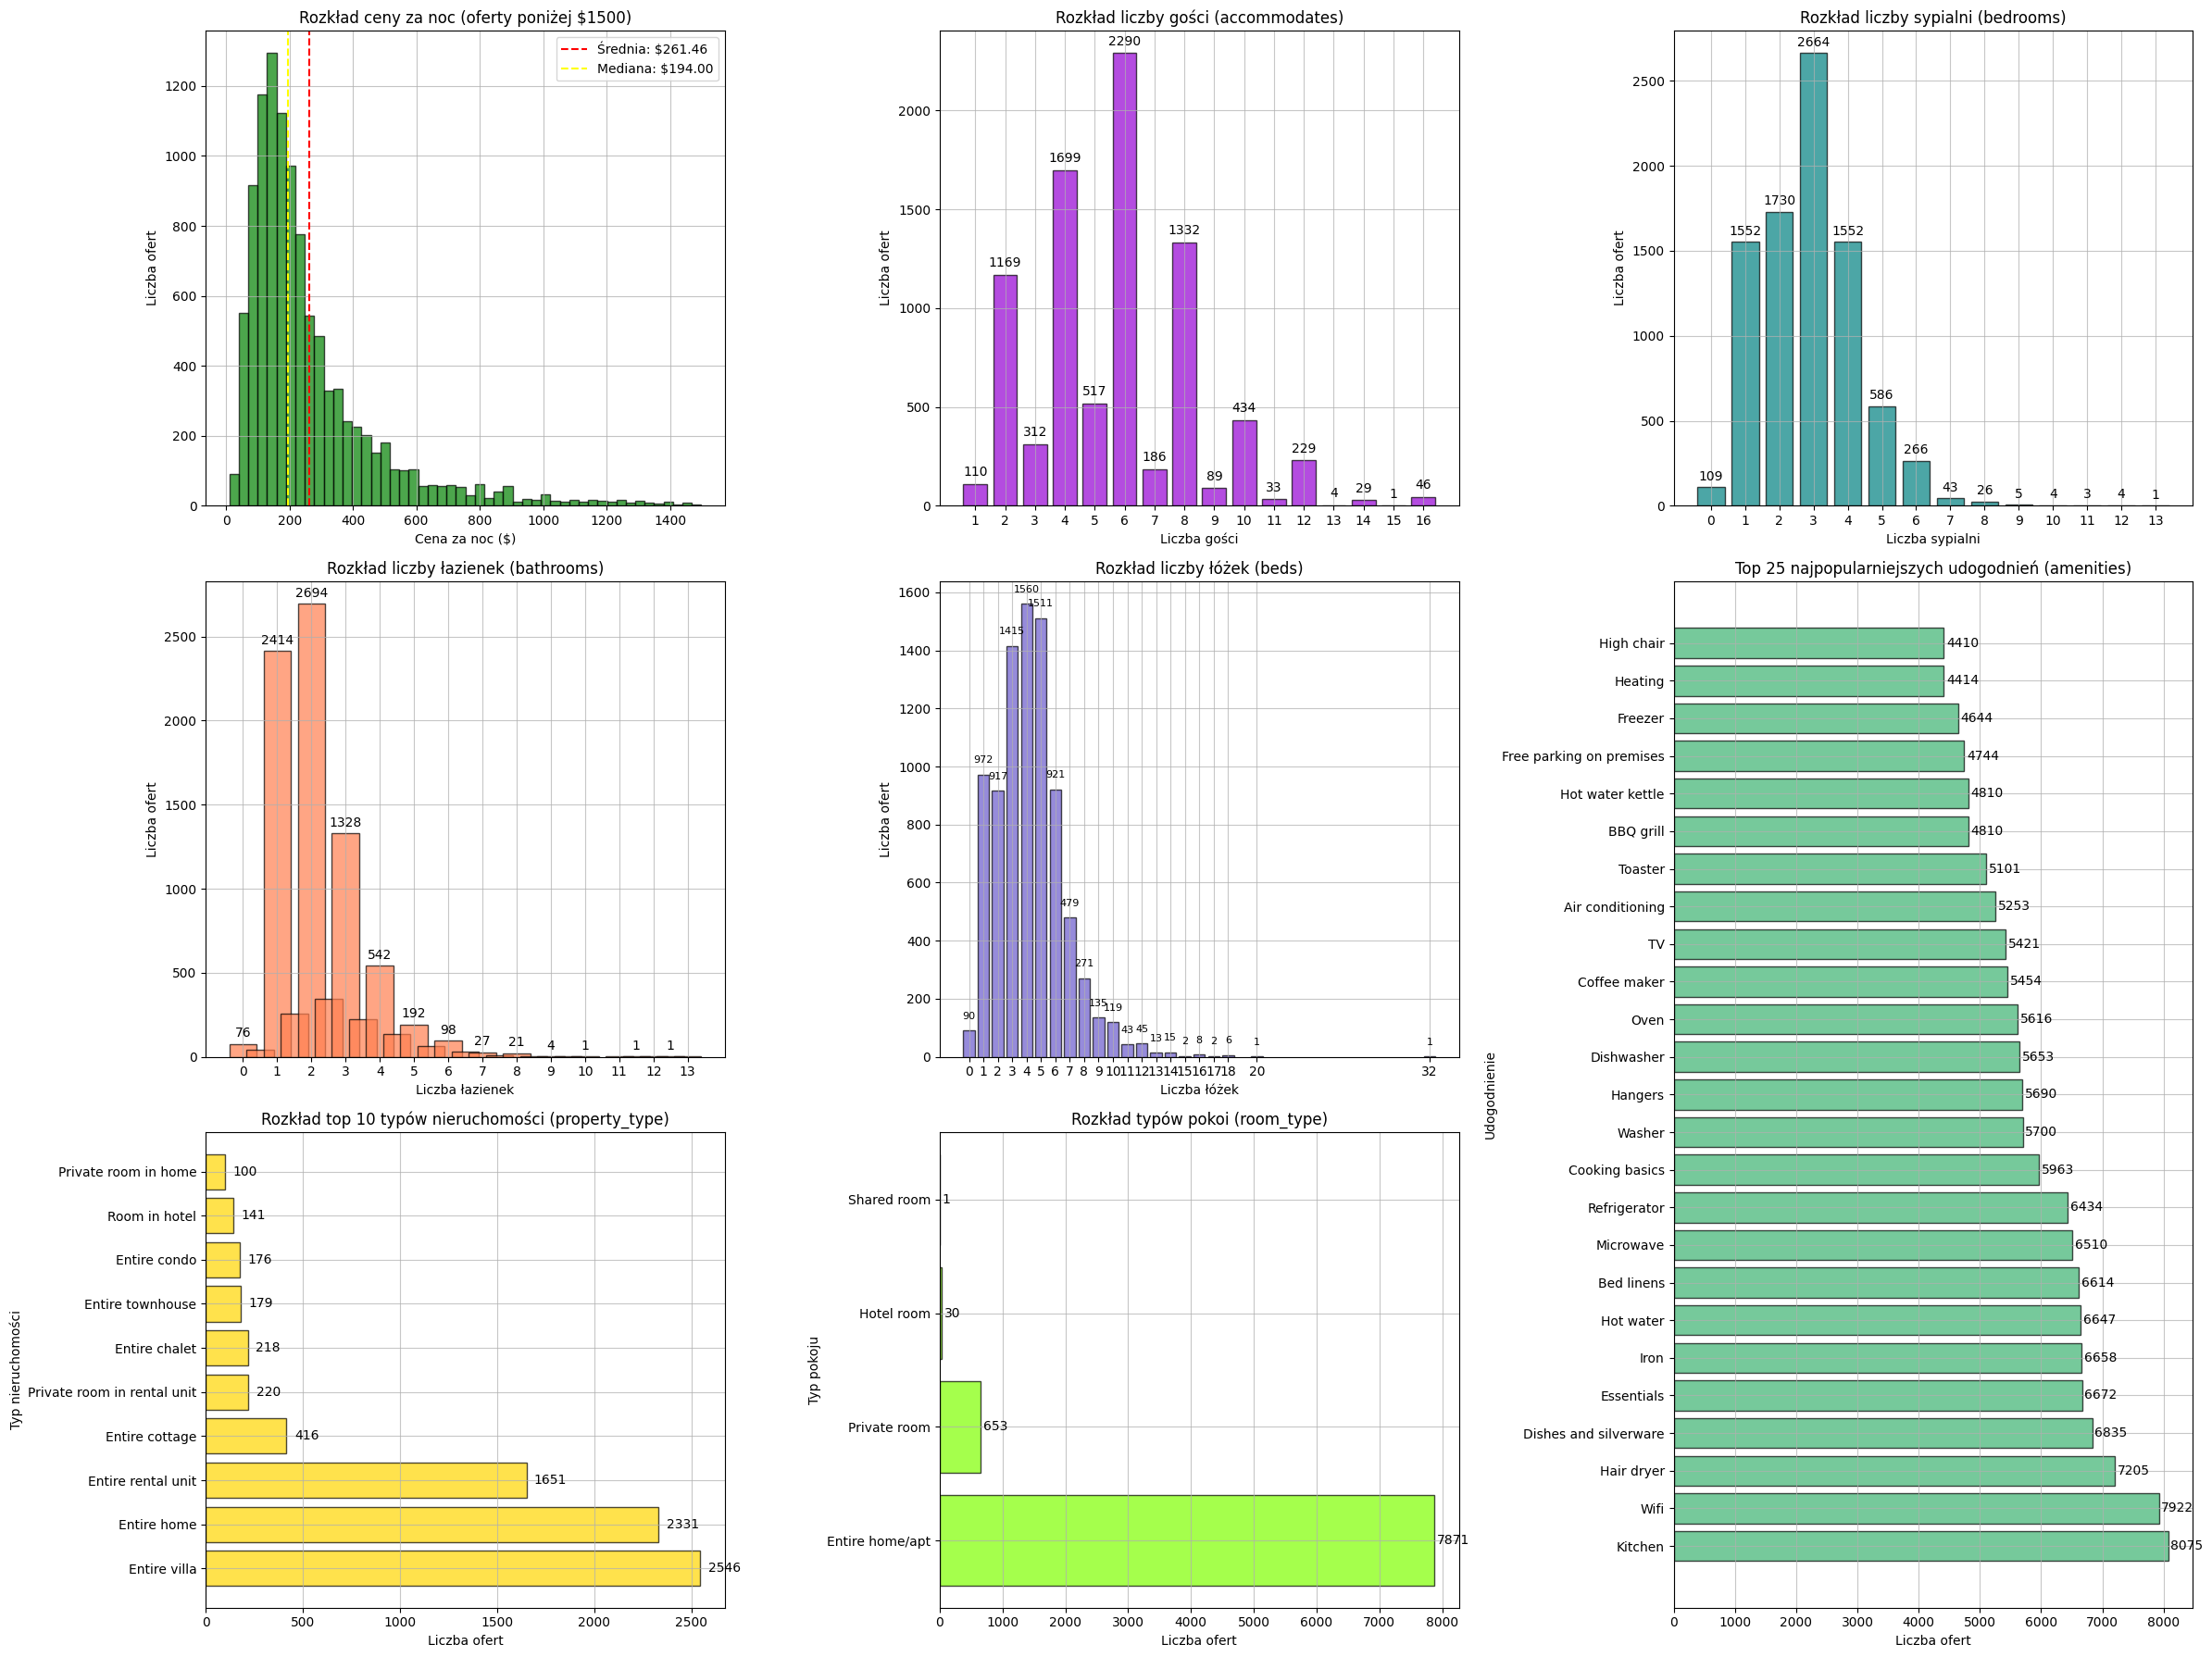

In [8]:
import ast

df_clean = df[
    df["price_numeric"].notna() & (df["price_numeric"] < 1500)
].copy()

fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(3, 3)

ax1 = fig.add_subplot(gs[0, 0])
price_filtered = price_data[price_data < 1500]
ax1.hist(price_filtered, bins=50, color="green", edgecolor="black", alpha=0.7)
ax1.set_xlabel("Cena za noc ($)")
ax1.set_ylabel("Liczba ofert")
ax1.set_title("Rozkład ceny za noc (oferty poniżej $1500)")
ax1.grid(alpha=0.75)
ax1.axvline(
    price_filtered.mean(),
    color="red",
    linestyle="dashed",
    label=f"Średnia: ${price_filtered.mean():.2f}",
)
ax1.axvline(
    price_filtered.median(),
    color="yellow",
    linestyle="dashed",
    label=f"Mediana: ${price_filtered.median():.2f}",
)
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
accomodates_counts = df_clean["accommodates"].value_counts().sort_index()
ax2.bar(
    accomodates_counts.index.to_numpy(),
    accomodates_counts.to_numpy(),
    color="darkviolet",
    edgecolor="black",
    alpha=0.7,
)
ax2.set_xticks(accomodates_counts.index.to_numpy())
ax2.set_xlabel("Liczba gości")
ax2.set_ylabel("Liczba ofert")
ax2.set_title("Rozkład liczby gości (accommodates)")
ax2.grid(alpha=0.7)
for i, v in enumerate(accomodates_counts.to_numpy()):
    ax2.text(
        accomodates_counts.index.to_numpy()[i], v + 40, str(v), color="black", ha="center"
    )

ax3 = fig.add_subplot(gs[0, 2])
bedrooms_counts = df_clean["bedrooms"].value_counts().sort_index()
ax3.bar(
    bedrooms_counts.index.to_numpy(),
    bedrooms_counts.to_numpy(),
    color="teal",
    edgecolor="black",
    alpha=0.7,
)
ax3.set_xticks(bedrooms_counts.index.to_numpy())
ax3.set_xlabel("Liczba sypialni")
ax3.set_ylabel("Liczba ofert")
ax3.set_title("Rozkład liczby sypialni (bedrooms)")
ax3.grid(alpha=0.7)
for i, v in enumerate(bedrooms_counts.to_numpy()):
    ax3.text(
        bedrooms_counts.index.to_numpy()[i], v + 40, str(v), color="black", ha="center"
    )

ax4 = fig.add_subplot(gs[1, 0])
bathrooms_counts = df_clean["bathrooms"].value_counts().sort_index()
ax4.bar(
    bathrooms_counts.index.to_numpy(),
    bathrooms_counts.to_numpy(),
    color="coral",
    edgecolor="black",
    alpha=0.7,
)
ax4.set_xticks(range(0, int(bathrooms_counts.index.max()) + 1))
ax4.set_xlabel("Liczba łazienek")
ax4.set_ylabel("Liczba ofert")
ax4.set_title("Rozkład liczby łazienek (bathrooms)")
ax4.grid(alpha=0.7)
for i, v in enumerate(bathrooms_counts.values[::2]):
    ax4.text(
        bathrooms_counts.index[i * 2],
        v + 40,
        str(v),
        color="black",
        ha="center",
    )

ax5 = fig.add_subplot(gs[1, 1])
beds_counts = df_clean["beds"].value_counts().sort_index()
ax5.bar(
    beds_counts.index.to_numpy(),
    beds_counts.to_numpy(),
    color="slateblue",
    edgecolor="black",
    alpha=0.7,
)
ax5.set_xticks(beds_counts.index.to_numpy())
ax5.set_xlabel("Liczba łóżek")
ax5.set_ylabel("Liczba ofert")
ax5.set_title("Rozkład liczby łóżek (beds)")
ax5.grid(alpha=0.7)
for i, v in enumerate(beds_counts.to_numpy()):
    ax5.text(
        beds_counts.index.to_numpy()[i],
        v + 40,
        str(v),
        color="black",
        ha="center",
        fontsize=8,
    )

ax6 = fig.add_subplot(gs[2, 1])
room_type_counts = df_clean["room_type"].value_counts()
ax6.barh(
    room_type_counts.index.to_numpy(),
    room_type_counts.to_numpy(),
    color="chartreuse",
    edgecolor="black",
    alpha=0.7,
)
ax6.set_xlabel("Liczba ofert")
ax6.set_ylabel("Typ pokoju")
ax6.set_title("Rozkład typów pokoi (room_type)")
ax6.grid(alpha=0.7)
for i, v in enumerate(room_type_counts.to_numpy()):
    ax6.text(v + 40, i, str(v), color="black", va="center")

ax7 = fig.add_subplot(gs[2, 0])
property_type_counts = df_clean["property_type"].value_counts().head(10)
ax7.barh(
    property_type_counts.index.to_numpy(),
    property_type_counts.to_numpy(),
    color="gold",
    edgecolor="black",
    alpha=0.7,
)
ax7.set_xlabel("Liczba ofert")
ax7.set_ylabel("Typ nieruchomości")
ax7.set_title("Rozkład top 10 typów nieruchomości (property_type)")
ax7.grid(alpha=0.7)
for i, v in enumerate(property_type_counts.to_numpy()):
    ax7.text(v + 40, i, str(v), color="black", va="center")

ax8 = fig.add_subplot(gs[1:, 2])
df_clean["amenities_list"] = df_clean["amenities"].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else []
)
amenities_exploded = df_clean["amenities_list"].explode()
top_amenities = amenities_exploded.value_counts().head(25)
ax8.barh(
    top_amenities.index.to_numpy(),
    top_amenities.to_numpy(),
    color="mediumseagreen",
    edgecolor="black",
    alpha=0.7,
)

ax8.set_xlabel("Liczba ofert")
ax8.set_ylabel("Udogodnienie")
ax8.set_title("Top 25 najpopularniejszych udogodnień (amenities)")
ax8.grid(alpha=0.7)
for i, v in enumerate(top_amenities.to_numpy()):
    ax8.text(v + 40, i, str(v), color="black", va="center")


plt.tight_layout()

Analizując rozkłady cech nieruchomości po odfiltrowaniu potencjalnie błędnych obserwacji, zauważyć można pewne charakterystyczne tendencje oraz trendy. Rozkłady cech opisujących pojemność nieruchomości są stosunkowo symetryczne z niewielką liczbą ekstremalnych wartości. Rozkład liczby gości wykazuje największe zagęszczenie dla nieruchomości przyjmujących 6 osób - istnieje 2311 takich ofert, natomiast oferty 2-, 4- oraz 8- osobowe również są częste, co sensownie koreluje z rozkładem liczby sypialni, bowiem w analizowanych danych przeważają nieruchomości 3-sypialniane (2664 oferty), następnie 2-sypialniane (1730) i 4-sypialniane (1552). Obserwacje te także znajdują potwierdzenie na wykresie liczby łóżek, która koncentruje się wokół 4-5 (kolejno 1560 i 1511 oferty). W wynajmowanych lokalach najczęściej spotyka się 1-2 łazienki - odpowiednio 2414 i 2694 takich ofert.

Struktura typów nieruchomości zdominowana jest przez całe wille (2546 ofert), całe domy (2331) oraz całe jednostki wynajmowane (1651). W kontekście typu pokoju obserwuje się zdecydowaną przewagę ofert typu "Entire home/apt" (7871 oferty), co stanowi około 92.0% wszystkich ogłoszeń, przy marginalnym udziale pokoi prywatnych (653) i pokoi hotelowych (30).

Ranking najpopularniejszych udogodnień odzwierciedla podstawowe oczekiwania rynkowe gości - niemal wszystkie nieruchomości wyposażone są w kuchnię (8075, czyli 94.6% oznaczonych ofert) i WiFi (7922).  Popularne są również suszarki do włosów (7205), zastawa stołowa (6835) oraz gorąca woda (6647).

W otrzymanych danych brakuje natomiast informacji o metrażu nieruchomości, roku budowy czy piętrze, które w tradycyjnym rynku nieruchomości stanowią istotne wyznaczniki ceny. Atrybuty te zostały uwzględnione w inicjalnym wniosku o dane dotyczące działalności firmy, ich brak sugeruje zatem, iż takie informacje nie są zbierane przez serwis Nocarz.

Inną, bardziej kompleksową, lecz potencjalnie cenną cechą nieruchomości jest jej lokalizacja, za którą odpowiadają kolumny `longitude` i `latitude`. W otrzymanych danych dotyczących ofert zawarto precyzyjne współrzędne geograficzne wynajmowanych lokali (kolumny `latitude` i `longitude`), a także tekstowe informacje o lokalizacji takie jak pełny adres w kolumnie `neighbourhood` oraz nazwa gminy i miasta w kolumnie `neighbourhood_cleansed`.  Poniższe wykresy mają na celu przedstawienie gęstości ofert oraz medianę ceny za noc za osobę w zależności lokalizacji na mapie Majorki, gdzie występują wszystkie nieruchomości. Nałożenie otrzymanych danych geograficznych na mapę wyspy pozwoli dodatkowo ocenić sensowność i potencjalną poprawność otrzymanych danych (np. czy nieruchomości nie znajdują się w wodzie).

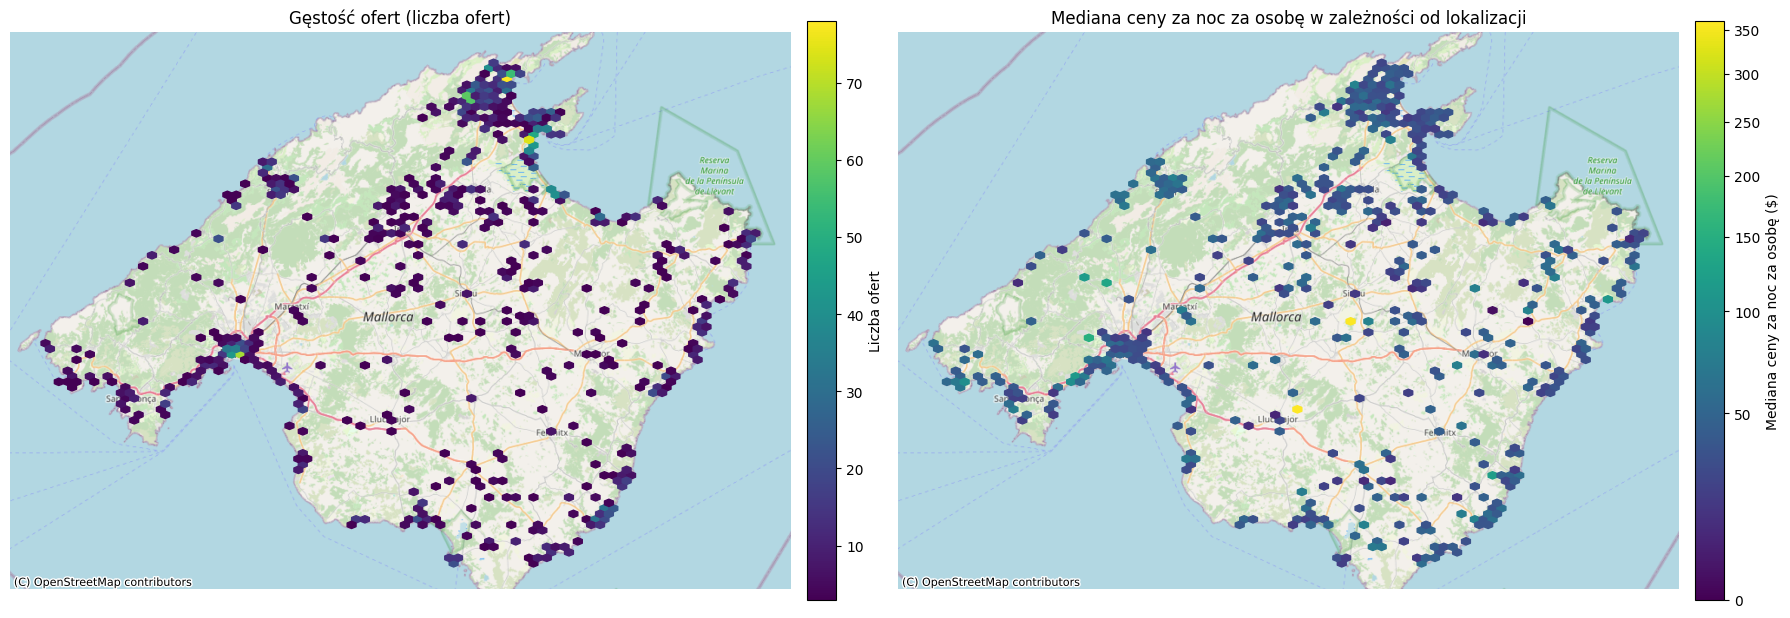

In [9]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx
from matplotlib import colors

minimum_offers_in_hex = 3

geo = df_clean.dropna(
    subset=["latitude", "longitude", "price_numeric", "accommodates"]
).copy()
geo["price_per_person"] = geo["price_numeric"] / geo["accommodates"]

gdf = gpd.GeoDataFrame(
    geo,
    geometry=gpd.points_from_xy(geo["longitude"], geo["latitude"]),
    crs="EPSG:4326",
).to_crs(epsg=3857)

x = gdf.geometry.x.to_numpy()
y = gdf.geometry.y.to_numpy()
p = gdf["price_per_person"].to_numpy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

hb1 = ax1.hexbin(x, y, gridsize=80, mincnt=minimum_offers_in_hex)
cx.add_basemap(ax1, source="OpenStreetMap.Mapnik", alpha=0.9)
ax1.set_axis_off()
ax1.set_aspect("equal", adjustable="box")
ax1.set_title("Gęstość ofert (liczba ofert)")

cbar1 = fig.colorbar(hb1, ax=ax1, fraction=0.035, pad=0.02)
cbar1.set_label("Liczba ofert")

norm = colors.PowerNorm(gamma=0.5)
hb2 = ax2.hexbin(
    x,
    y,
    C=p,
    reduce_C_function=np.median,
    gridsize=80,
    mincnt=minimum_offers_in_hex,
    norm=norm,
)
cx.add_basemap(ax2, source="OpenStreetMap.Mapnik", alpha=0.9)
ax2.set_axis_off()
ax2.set_aspect("equal", adjustable="box")
ax2.set_title("Mediana ceny za noc za osobę w zależności od lokalizacji")

cbar2 = fig.colorbar(hb2, ax=ax2, fraction=0.035, pad=0.02)
cbar2.set_label("Mediana ceny za noc za osobę ($)")

plt.tight_layout()
plt.show()

Rozmieszczenie ofert w otrzymanych danych wykazuje wyraźną nierównomierność przestrzenną. Największa koncentracja ogłoszeń występuje w północno-wschodniej części wyspy, ze szczególnym uwzględnieniem aglomeracji Palmy de Mallorca oraz kurortów wzdłuż północnego wybrzeża. Widoczne są również mniejsze klastry w zachodniej części wyspy. Centrum Majorki, charakteryzujące się górzystym terenem, wyróżnia się praktycznie brakiem ofert. Otrzymane dane wydają się być więc poprawne, sensownie odzwierciedlając turystyczny charakter rynku.

Przestrzenny rozkład cen prezentuje umiarkowane zróżnicowanie. Duża część lokalizacji w najbardziej popularnych regionach mieści się w przedziale 100-200$ za noc. Nie występują wyraźne tendencje bezpośrednio pokazujące zależność ceny za noc za osobę od współrzędnych geograficznych (np. "lokale na północy są zazwyczaj droższe") - brak na wykresie wyraźnych dużych stref geograficznych o konsekwentnie wyższych cenach. Dużo bardziej potencjalnie interesującą informacją w porównaniu do czystej długości i szerokości geograficznej stanowi informacja o dzielnicy, w jakiej znajduje się nieruchomość. Drugi wykres sugeruje wzrost cen w pobliżu gmin takich jak Deià (zachód wyspy), Andratx (południowy zachód) czy Felanitx (południowy wschód). Biorąc pod uwagę kompleksowość uwzględnienia długości i szerokości geograficznej w modelu mimo realnie znikomego zysku, sama informacja o współrzędnych geograficznych nieruchomości nie wydaje się oferować dobrego stosunku wartości predykcyjnej do złożoności implementacji. Dobrym kandydatem jest jednak potencjalnie kolumna `neighbourhood_cleansed`, wskazująca gminę lub dzielnicę, w której znajduje się nieruchomość. Aby potwierdzić te obserwacje, potrzebna jest jednak analiza zależności ceny od dzielnicy, która ma miejsce w następnym rozdziale notatnika.

Mniej intuicyjnymi, ale potencjalnie cennymi atrybutami mogą być informacje o bardziej technicznym charakterze, opisujące ograniczenia długości pobytu, dostępność lokalu w czasie oraz skalę działalności gospodarza.

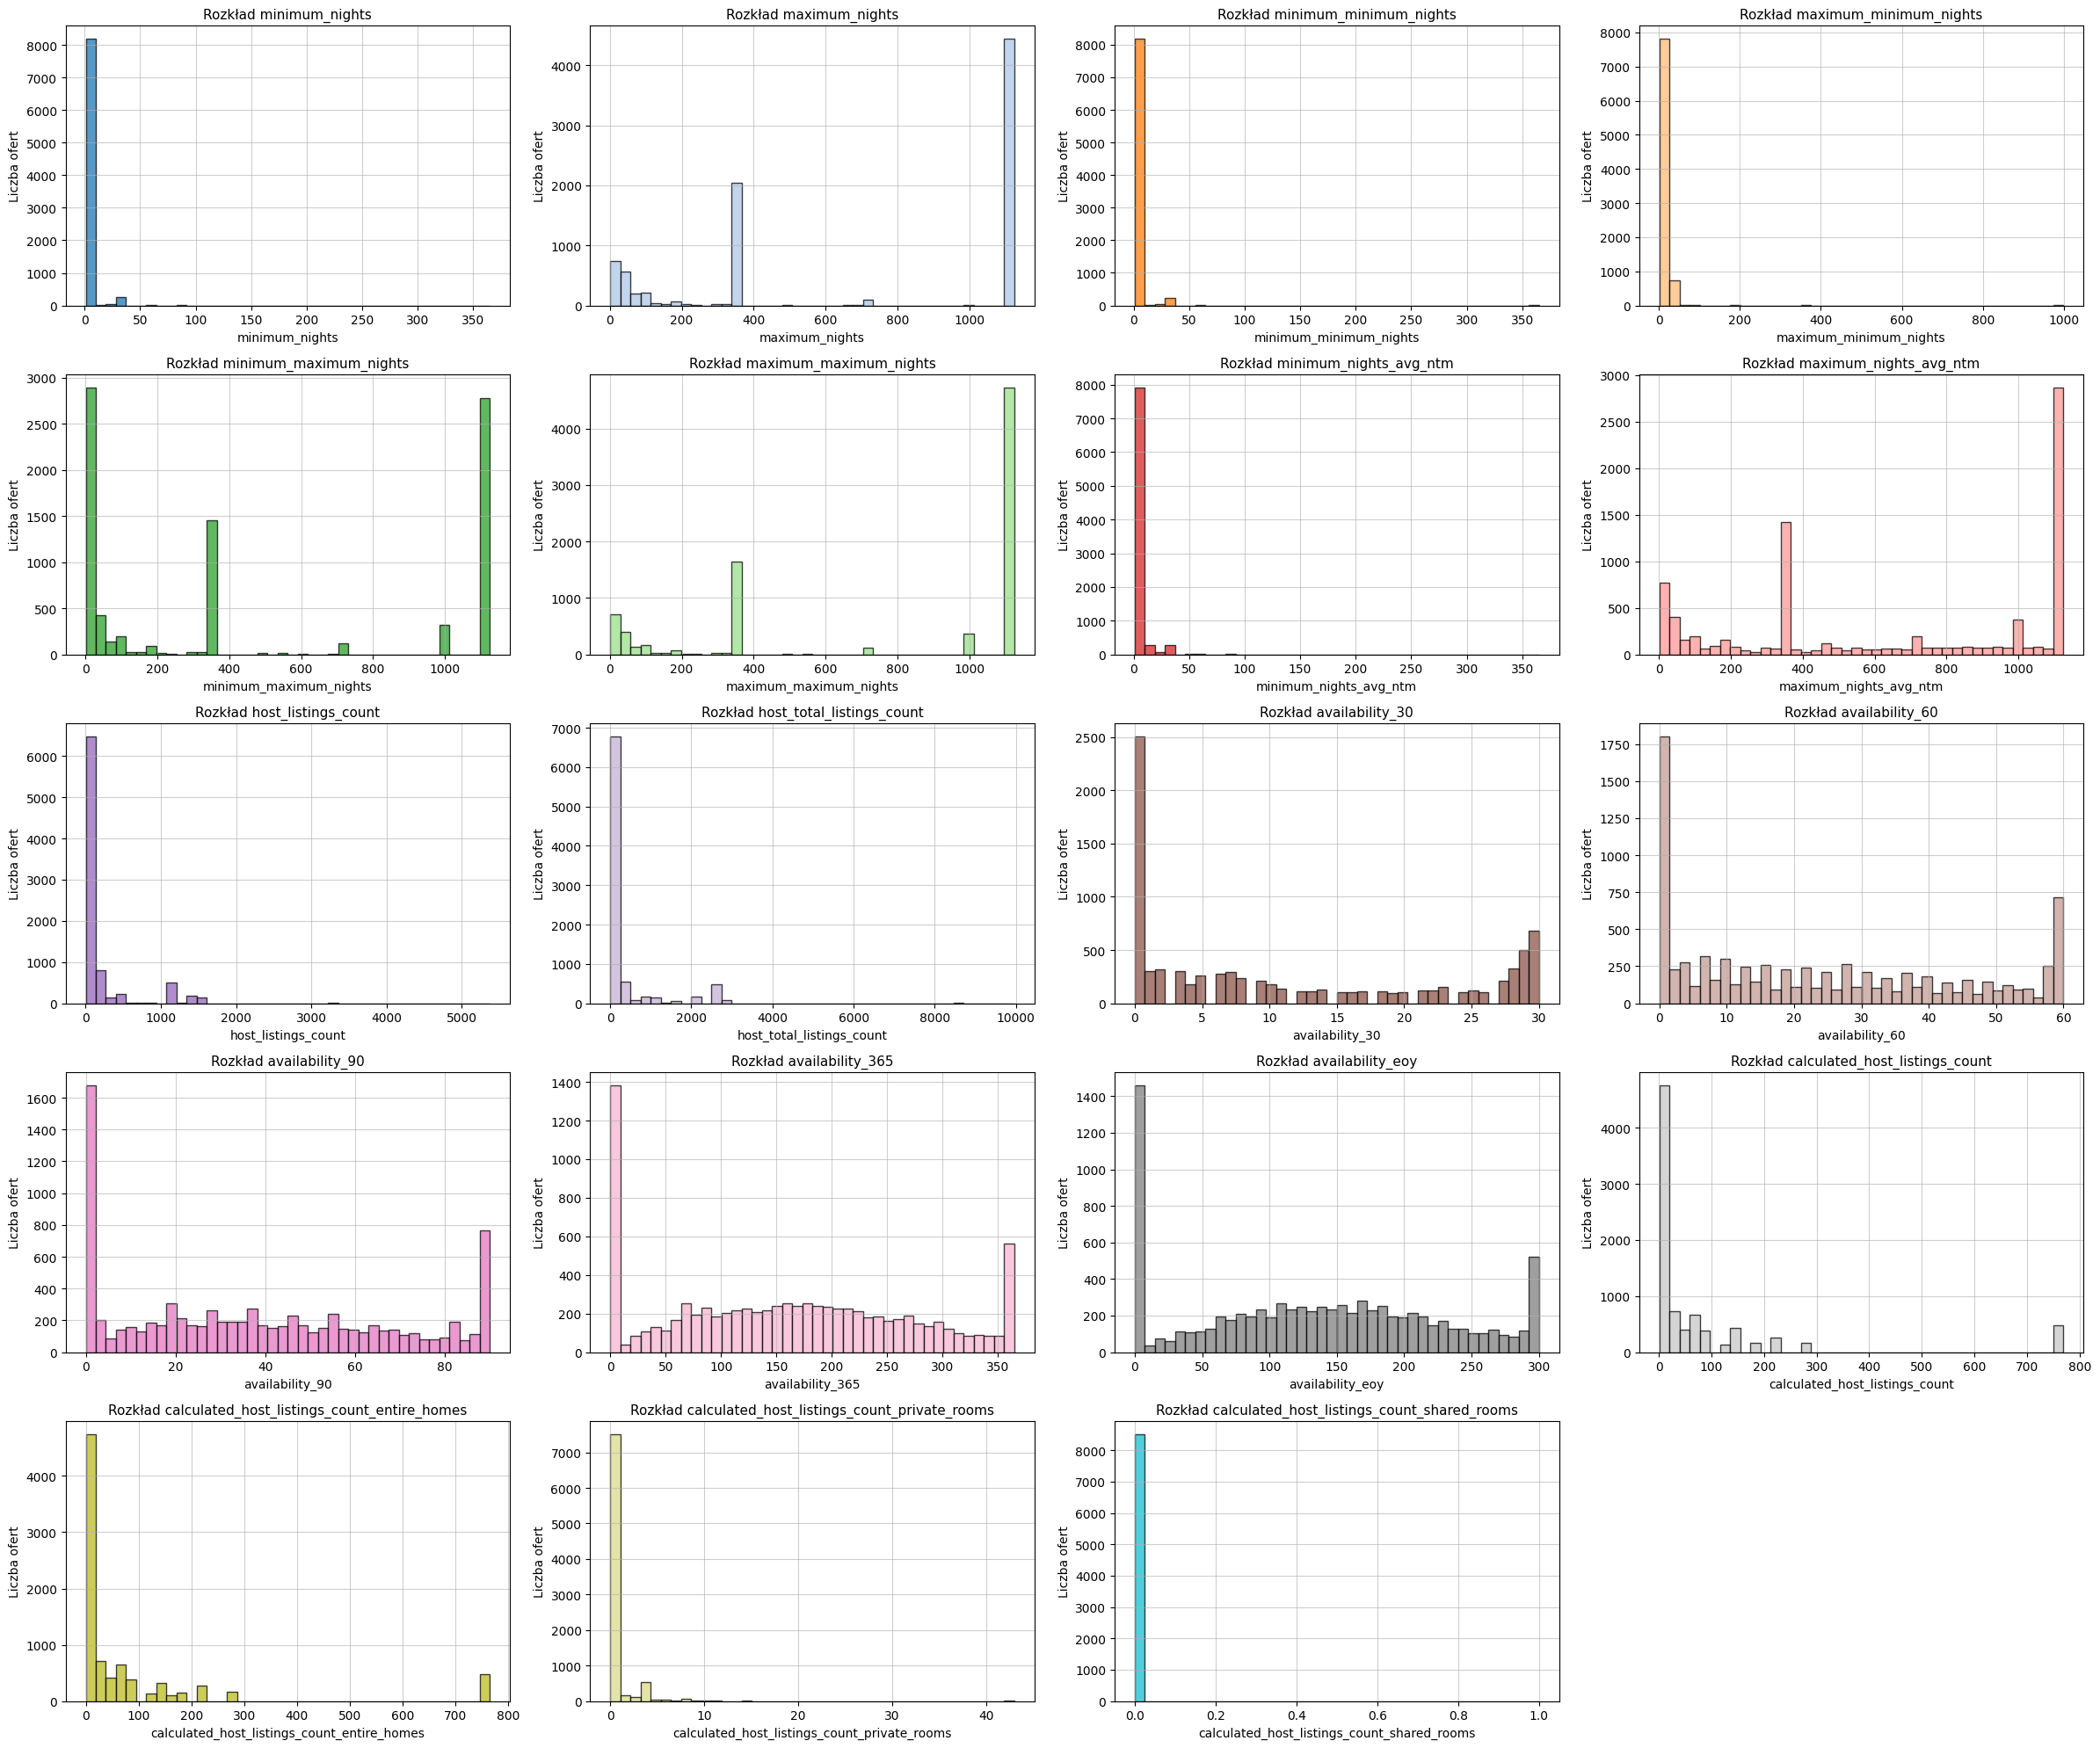

In [10]:
dist_cols = [
    "minimum_nights",
    "maximum_nights",
    "minimum_minimum_nights",
    "maximum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm",
    "host_listings_count",
    "host_total_listings_count",
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365",
    "availability_eoy",
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms",
]

n_cols = 4
n_rows = int(np.ceil(len(dist_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 4 * n_rows))
axes = axes.flatten()

for ax, col, color in zip(axes, dist_cols, plt.cm.tab20.colors):  # type: ignore
    data = pd.to_numeric(df_clean[col], errors="coerce").dropna()

    ax.hist(data, bins=40, color=color, edgecolor="black", alpha=0.75)
    ax.set_title(f"Rozkład {col}", fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel("Liczba ofert")
    ax.grid(alpha=0.6)

for ax in axes[len(dist_cols) :]:
    ax.axis("off")

plt.tight_layout()
plt.show()

Analiza rozkładów bardziej "technicznych" zmiennych ukazuje częstą obecność wartości skrajnych. Często pojawiajace się w kolumnach związanych z ograniczeniami długości pobytu wartości przekraczające 100 sugerują, iż gospodarze często oznaczają w taki sposób oferty z praktycznie nieograniczonym maksymalnym czasem pobytu - takie oferty nie odzwierciedlają bezpośrednio rzeczywistych charakterów rezerwacji. Rozkłady zmiennych opisujących skalę działalności gospodarzy wykazuje, iż zdecydowana większość gospodarzy posiada jedną lub kilka ofert, natomiast niewielka liczba hostów zarządza bardzo dużą liczbą lokali. Zmienne dostępności lokalu wykazują wyraźne skupienia przy wartościach skrajnych - widoczne są zarówno oferty niemal całkowicie dostępne, jak i takie, które są w dużym stopniu zarezerwowane. Zmienne te mają zatem charakter silnie asymetryczny, a ich ewentualne wykrozystanie w dalszym modelowaniu wymaga ostrożnej obróbki tychże cech.

### **Analiza zależności ceny od atrybutów**
Przedstawione w poprzednim rozdziale rozkłady wybranych atrybutów dobrze ilustrują najpopularniejsze typy oraz charakterystyczne cechy nieruchomości wynajmowanych na platformie Nocarz. Istotnym krokiem eksploracyjnej analizy danych jest jednak potwierdzenie korelacji między analizowanymi cechami a badaną zmienną docelową. Niniejszy rozdział skupia się na zbadaniu korelacji między ceną wynajmowanego lokalu za noc a wybranymi cechami opisującymi nieruchomość, politykę dostępności oraz charakterystykę gospodarza. W tym celu wykorzystano macierz korelacji Pearsona, umożliwiająca wstępną selekcję cech, które mogą mieć największą wartość predykcyjną. 

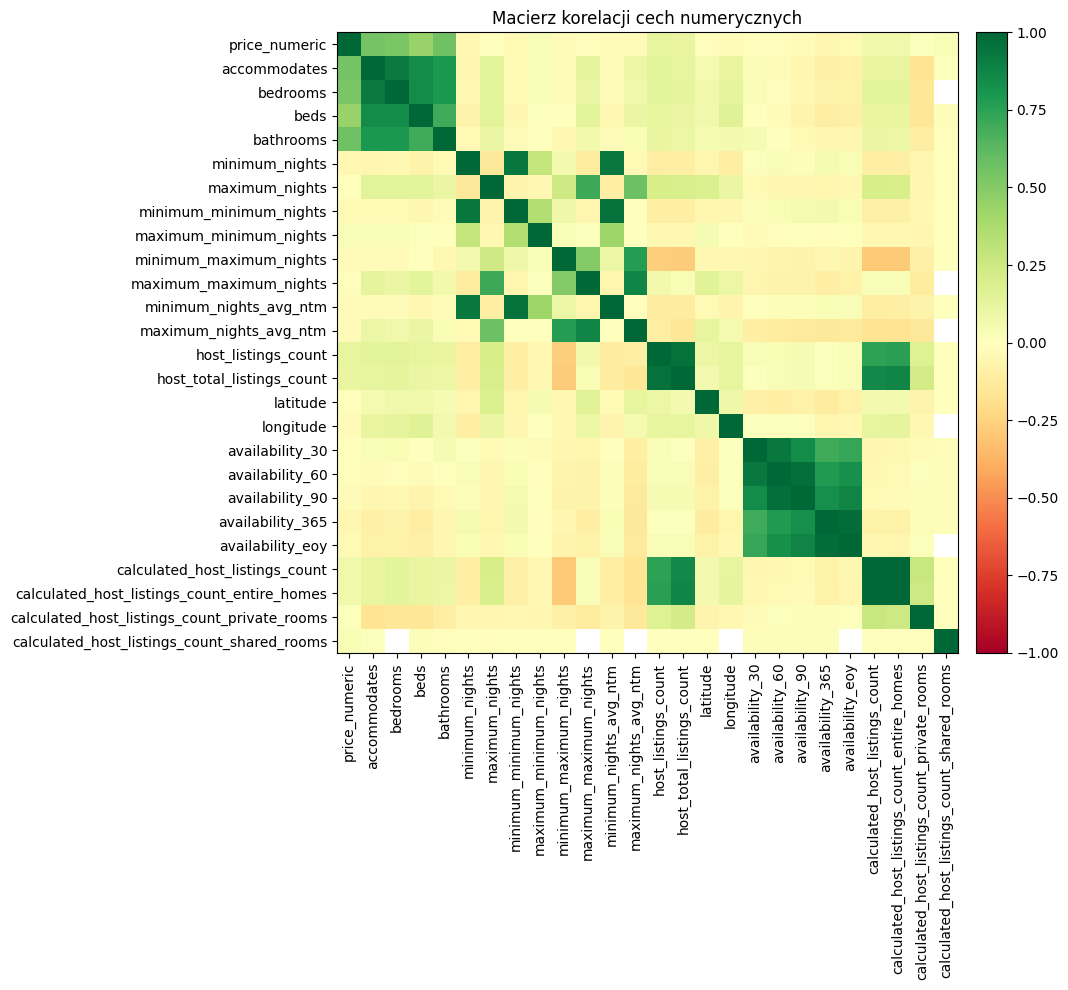

In [11]:
cols = [
    "price_numeric",
    "accommodates",
    "bedrooms",
    "beds",
    "bathrooms",
    "minimum_nights",
    "maximum_nights",
    "minimum_minimum_nights",
    "maximum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm",
    "host_listings_count",
    "host_total_listings_count",
    "latitude",
    "longitude",
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365",
    "availability_eoy",
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms",
]

plt.figure(figsize=(12, 10))
corr_matrix = df_clean[cols].corr()
im = plt.imshow(corr_matrix, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.035, pad=0.02)
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)
plt.title("Macierz korelacji cech numerycznych")
plt.tight_layout()
plt.show()

Uzyskana macierz korelacji wskazuje na wyraźne, często dość intuicyjne zależności między ceną za noc a cechami opisującymi nieruchomość. Zdecydowanie najsilniej skorelowane są cechy opisujące "wielkość" lokalu, takie jak liczba łazienek, sypialni czy łóżek, a także maksymalna liczba gości. Znacznie niższe, często niemal zerowe korelacje obserwowane są w przypadku zmiennych opisujących ograniczenia długości pobytu oraz skalę działalności gospodarza. Sama liczba ofert bądź polityka maksymalnej bądź minimalnej liczby nocy nie wpływa zatem bezpośrednio na cenę za pojedynczą noc. 

In [12]:
numeric_cols = [
    "accommodates",
    "bedrooms",
    "beds",
    "bathrooms",
    "minimum_nights",
    "maximum_nights",
    "number_of_reviews",
    "host_listings_count",
    "host_total_listings_count",
]

corr_df = (
    pd.DataFrame(
        {
            "feature": numeric_cols,
            "correlation": [
                pd.to_numeric(df_clean[col], errors="coerce").corr(
                    df_clean["price_numeric"]
                )
                for col in numeric_cols
            ],
        }
    )
    .set_index("feature")
    .sort_values("correlation", ascending=False)
)

corr_df.style.background_gradient(
    cmap="RdYlGn",
)

,correlation
feature,
bathrooms,0.567948
accommodates,0.548051
bedrooms,0.536402
beds,0.441018
host_listings_count,0.119631
host_total_listings_count,0.111436
maximum_nights,-0.000635
minimum_nights,-0.042180
number_of_reviews,-0.157519


Przedstawiona analiza korelacji ponownie wyraźnie pokazuje, iż kluczowymi determinantami ceny są przede wszystkim pojemność i "wielkość" nieruchomości - liczba łazienek, sypialni i łózek. Ograniczenia długości pobytu (`minimum_nights`, `maximum_nights`) oraz skala działalności gospodarza (`host_listings_count`, `host_total_listings_count`) nie wpływają raczej bezpośrednio na cenę za noc i mają marginalne znaczenie w kontekście zadania. Warto również zauważyć, iż popularne, często rezerwowane lokale są raczej tańsze (korelacja kolumny `number_of_reviews` jest ujemna) - kolumna ta nie będzie jednak wykorzystywana w dalszych fazach modelowania. Fundamentalne założenie projektu stanowi bowiem, iż szacowana cena wyznaczana jest dla nowej oferty, która nie zawiera jeszcze recenzji ani informacji o popularności oferty. 



In [13]:
top_amenities = amenities_exploded.value_counts().head(50)
top_amenity_names = top_amenities.index.tolist()
df_clean_am = df_clean.copy()

for amenity in top_amenity_names:
    df_clean_am[f"amenity_{amenity}"] = df_clean_am["amenities_list"].apply(
        lambda x: int(amenity in x)
    )

amenity_corr = (
    pd.DataFrame(
        {
            "amenity": top_amenity_names,
            "correlation": [
                df_clean_am[f"amenity_{am}"].corr(df_clean_am["price_numeric"])
                for am in top_amenity_names
            ],
        }
    )
    .set_index("amenity")
    .sort_values("correlation", ascending=False)
)


amenity_corr[
    amenity_corr["correlation"].abs() > 0.05
].style.background_gradient(cmap="RdYlGn")

,correlation
amenity,
BBQ grill,0.170604
Dishwasher,0.133411
Pool,0.108965
Barbecue utensils,0.108191
Bathtub,0.099436
Free parking on premises,0.098062
Indoor fireplace,0.096985
Backyard,0.077984
Smoke alarm,0.075131


Spośród 50 najpopularniejszych udogodnień wskazywanych w ofertach nieruchomości, 21 z nich wykazuje bezwzględną wartość korelacji powyżej progu 0.05. Wysokie dodatnie korelacje odnotowano m.in. dla grilla oraz basenu (kolejno ≈0.17 oraz ≈0.11), które rzeczywiście stanowią udogodnienie "klasy premium" na rynku turystycznym i mogą mieć wpływ na postrzeganie wartości wynajmu przez klientów. Słabsze korelacje zaobserwowano m.in. dla wanny czy kominka. Ujemną korelację z ceną wykazują udogodnienia takie jak "wieszaki" czy "darmowy parking na ulicy", stanowiące podstawowe elementy wyposażenia, typowe dla tańszych ofert. W przeciwieństwie do cech charakteryzujących "wielkość" nieruchomości nie zaobserwowano bardzo wysokich korelacji wśród udogodnień, sugerując, iż pojedyncze elementy wyposażenia nieruchomości nie determinują cen za noc w izolacji. Udogodnienia takie jak grill BBQ, basen czy zmywarka są jednak dobrymi kandydatami do dalszej analizy w fazie budowy modelu. 

Dane o właścicielu również mogą stanowić istotne zmienne predykcyjne. Kolumna `is_superhost` zawiera informację, czy host otrzymał status superhost, przyznawany przez serwis Nocarz za wysoką jakość obsługi, który w rezultacie może prowadzić do podwyższenia cen przez gospodarza uzasadniającego taką decyzję wysokim zaufaniem, jakim darzą go goście. W ramach następnych etapów implementacji warto również rozważyć wpływ czynników takich jak responsywność hosta (`host_response_time`, `host_response_rate`), a także liczbie ofert oferenta na platformie (`host_listings_count` oraz `host_total_listings_count`). Kolumny te mogą świadczyć o profesjonalizmie oraz zaangażowaniu oferenta, zwiększając jego zaufanie wśród gości.

Kolumny zawierające informację dotyczące recenzji oraz ocen wystawianych na platformie ofert (takie jak `number_of_reviews_ltm`, `review_scores_cleanliness` czy `reviews_per_month`), a także metryk opisujących obłożenie lokalu (jak `estimated_occupancy_l365d`, szacująca liczbę dni zajętości lokalu w ciągu ostatnich 365 dni), nie będą stanowiły atrybutów wykorzystywanych przez model. Fundamentalne założenie projektu stanowi, iż szacowana cena wyznaczana jest dla nowej oferty, która nie zawiera jeszcze recenzji ani informacji o popularności oferty. Dane techniczne, takie jak kolumny `scrape_id`, `last_scraped` czy kolumny zawierające adresy URL jak `host_thumbnail_url`, również nie będą wykorzystywane jako cechy w modelu predykcyjnym.


In [14]:
df_clean.groupby("host_is_superhost")["price_numeric"].agg(
    ["count", "mean", "median"]
)

,count,mean,median
host_is_superhost,,,
f,6298,271.262623,197.0
t,2171,239.235375,180.0


W przypadku potencjalnie cennych atrybutów kategorycznych, dla których klasyczna analiza korelacji nie ma bezpośredniego zastosowania, przedstawiono analizę porównawczą rozkładów ceny w zależności od wartości danej cechy. Analiza zmiennej `host_is_superhost` pokazuje, iż oferty prowadzone przez gospodarzy bez statusu superhosta cechują się wyższą średnią ceną za noc (≈271$) niż oferty superhostów (≈239$). Atrybut ten stanowi zatem potencjalnie istotnego kandydata w fazie modelowania.

In [15]:
df_clean.groupby("neighbourhood_cleansed")["price_numeric"].agg(
    ["count", "mean", "median"]
).sort_values("mean", ascending=False)

,count,mean,median
neighbourhood_cleansed,,,
Deyá,49,460.714286,416.0
Andratx,108,409.185185,243.5
Esporles,29,406.103448,361.0
Marratxí,64,366.171875,304.5
Bunyola,36,349.972222,293.0
Calvià,261,338.762452,184.0
Felanitx,314,323.264331,239.5
Escorca,12,321.000000,240.0
Búger,97,302.164948,210.0


Silne zróżnicowanie widoczne jest w obserwacji zależności ceny za noc od lokalizacji (`neighborhood_cleansed`), potwierdzając obserwacje z poprzedniego rozdziału. Najwyższe wartości średnich cen noclegów rzeczywiście zaobserwowano w dzielnicach takich jak Deyá, Andratx, Felanitx oraz Esporles. Wyraźnie najniższe ceny, cechujące się medianą dużo niższą od mediany całkowitej ($194), występują w stolicy wyspy, Palma de Mallorca oraz małej gminie Estellencs. Uzyskane dane wskazują zatem na istotny wpływ dzielnicy na poziom cen, potwierdzajac zasadność uwzględnienia zmiennej opisującej dzielnicę, w której znajduje się nieruchomość, w dalszym modelowaniu. 

## **Modelowanie wstępne**
W ramach modelowania wstępnego zbudowano i porównano proste modele predykcyjne w celu ustanowienia punktów odniesienia oraz weryfikacji, czy obserwowane wcześniej zależności między ceną a cechami nieruchomości przekładają się na mierzalną poprawę wyników modelu.

W pierwszej kolejności zastosowano bardzo proste, naiwne podejścia predykcyjne, przewidujące cenę na podstawie średniej lub mediany ze zbioru treningowego. W ramach trzeciego modelu, uwzględniono pojedynczą zmienną kategoryczną, `neighbourhood_cleansed`, przypisując zawsze średnią ceny dla danej lokalizacji. Na koniec wykorzystano również proste modele regresji liniowej oraz lasu losowego, uwzględniając zarówno zmienne numeryczne jak i kategoryczne, których rozkład oraz wpływ badany był w poprzednich rozdziałach. 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

num_cols = ["accommodates", "bedrooms", "beds", "bathrooms"]
cat_cols = [
    "room_type",
    "property_type",
    "neighbourhood_cleansed",
    "host_is_superhost",
]

X = df_clean[num_cols + cat_cols].copy()
y = df_clean["price_numeric"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=999
)
mean_price = y_train.mean()
median_price = y_train.median()

# Naive mean
y_pred_mean = np.ones(len(y_test)) * mean_price
mae_mean = mean_absolute_error(y_test, y_pred_mean)
rmse_mean = np.sqrt(mean_squared_error(y_test, y_pred_mean))
r2_mean = r2_score(y_test, y_pred_mean)

# Naive median
y_pred_median = np.ones(len(y_test)) * median_price
mae_median = mean_absolute_error(y_test, y_pred_median)
rmse_median = np.sqrt(mean_squared_error(y_test, y_pred_median))
r2_median = r2_score(y_test, y_pred_median)

# Grouped by neighbourhood
train_df = X_train.copy()
train_df["price_numeric"] = y_train.values
neighbourhood_means = train_df.groupby("neighbourhood_cleansed")[
    "price_numeric"
].mean()
y_pred_neigh = (
    X_test["neighbourhood_cleansed"]
    .map(neighbourhood_means)
    .fillna(mean_price)
)
mae_neigh = mean_absolute_error(y_test, y_pred_neigh)
rmse_neigh = np.sqrt(mean_squared_error(y_test, y_pred_neigh))
r2_neigh = r2_score(y_test, y_pred_neigh)

# Linear regression
num_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
    ]
)

cat_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ]
)
linreg_model = Pipeline(
    steps=[("prep", preprocess), ("model", LinearRegression())]
)

linreg_model.fit(X_train, y_train)
y_pred_lr = linreg_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)


# Random forest
rf_model = Pipeline(
    steps=[
        ("prep", preprocess),
        (
            "model",
            RandomForestRegressor(
                n_estimators=300,
                max_depth=None,
                min_samples_leaf=5,
                random_state=999,
                n_jobs=-1,
            ),
        ),
    ]
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)


results = pd.DataFrame(
    {
        "model": [
            "Naive (mean)",
            "Naive (median)",
            "Grouped by neighbourhood",
            "Linear Regression",
        ],
        "MAE": [
            f"{mae_val:.2f}"
            for mae_val in [mae_mean, mae_median, mae_neigh, mae_lr]
        ],
        "RMSE": [
            f"{rmse_val:.2f}"
            for rmse_val in [rmse_mean, rmse_median, rmse_neigh, rmse_lr]
        ],
        "MAE (rel.)": [
            f"{mae_val / mean_price * 100:.2f}%"
            for mae_val in [mae_mean, mae_median, mae_neigh, mae_lr]
        ],
        "R2": [
            f"{r2_val:.4f}" for r2_val in [r2_mean, r2_median, r2_neigh, r2_lr]
        ],
    }
).set_index("model")

results.loc["Random Forest"] = [
    f"{mae_rf:.2f}",
    f"{rmse_rf:.2f}",
    f"{mae_rf / mean_price * 100:.2f}%",
    f"{r2_rf:.4f}",
]

results

,MAE,RMSE,MAE (rel.),R2
model,,,,
Naive (mean),149.81,217.95,57.29%,-0.0000
Naive (median),136.60,228.12,52.24%,-0.0955
Grouped by neighbourhood,145.56,213.87,55.67%,0.0372
Linear Regression,113.73,174.05,43.49%,0.3623
Random Forest,109.28,171.38,41.79%,0.3818


Zgodnie z przewidywaniami, naiwne podejścia predykcyjne charakteryzują się bardzo niską jakością - zarówno model oparty na średniej ceny, jak i medianie generuje bardzo wysokie błędy bezwzględne przekraczające 50% średniej ceny, jasno pokazując, iż nieuwzględnianie cech ofert jest niewystarczające dla przeprowadzenia jakościowej predykcji. Model oparty na grupowaniu po dzielnicach przynosi nieznaczną poprawę w postaci dodatniej wartości współczynnika $R^2$, jednak sama informacja o dzielnicy jest wyraźnie niewystarczająca do rzetelnego opisu zróżnicowania cen. Wyraźny skok jakości wykazuje natomiast model stosujący regresję liniową, który zmniejsza MAE do poziomu ok. 113,7 dolarów oraz charakteryzuje się wartością $R^2$ na poziomie 0,36 - model ten jest zatem w stanie wyjaśnić znaczącą część zmienności cen. Najlepsze wyniki w ramach modelowania wstępnego osiąga z kolei model stosujący las losowy, wykazujący się najniższymi wartościami MAE, RMSE i najwyższym współczynnikiem $R^2$ - różnica względem regresji liniowej jest jednak umiarkowana. Uzyskane wyniki potwierdzają zasadność uwzględniania zarówno atrybutów numerycznych jak i kategorycznych w dalszych etapach analizy i umożliwiają określenie sensownego punktu odniesienia.

## **Podsumowanie**

Biorąc pod uwagę wyniki eksploracyjnej analizy danych, zaobserwowano liczne nieścisłości, wymagające uwagi klienta. Na potrzeby budowy podstawowego modelu, do momentu uzyskania pełniejszych danych przyjęto następujące założenia:
- Nietypowy rozkład wartości zmiennej docelowej sugeruje powszechne zjawisko ustawiania wysokiej domyślnej ceny przez właścicieli nieruchomości bądź celowe zawyżanie kwot do zaporowych cen w celu praktycznego uniemożliwienia noclegów. Oferty o cenie za noc wynoszącej 1500 dolarów lub więcej zostały usunięte ze zbioru danych.
- Braki w kolumnach numerycznych uzupełniane są medianą.
- Braki w kolumnach kategorycznych uzupełniane są najczęściej występującą wartością.
- W ramach dalszego modelowania, wstępnie wybrane atrybuty wejściowe służące do przewidywania ceny za noc (kolumna `price_numeric`) stanowić będą kolumny `accommodates`, `bedrooms`, `beds`, `bathrooms`, `room_type`, `property_type`, `neighbourhood_cleansed`, `host_is_superhost` oraz `amenities`.

Otrzymane dane wejściowe nie są wysokiej jakości - zawierają liczne braki, a także poważne potencjalne anomalie i błędy. Dalsze kroki wymagają zatem przyjęcia istotnych założeń dotyczących strategii imputacji oraz filtracji potencjalnych anomalii cenowych. Przyjęcie tych ustaleń pozwala zaobserwować istotne korelacje w "poprawnych" danych między cechami nieruchomości a ceną stanowiącą zmienną docelową, implikujące wykonalność zadania. Zebranie danych o wyższej jakości poprzez usprawnienie mechanizmów zbierania danych lub ręczne etykietowanie obecnych nieścisłości przez ekspertów znacząco ułatwiłoby zadanie i z dużym prawdopodobieństwem zwiększyłoby jakość przewidywań - obecny stan danych pozwala jednak na realizację projektu, o ile przyjęte kluczowe założenia oraz decyzje podjęte w procesie modelowania danych zostaną zatwierdzone przez klienta.